In [1]:
import sympy as sym
import la_figures
from IPython.display import SVG, display
from matrixlayout.ge import ge_grid_svg

# Gaussian Elimination
Comprehensive GE trace and spec parameters.

Key parameters: `pivoting`, `gj`, `show_pivots`, `decorations`, `callouts`,
`pivot_style`, `outer_hspace_mm`, `cell_align`, `output_dir`.


By default, elimination steps within a pivot column are consolidated into a single elementary matrix.
Set `consolidate_elimination=False` in `ge_trace(...)` to retain per-row steps.


`la_figures` includes a Gaussian elimination / Gauss–Jordan implementation with optional partial pivoting.  
It emits a matrix stack plus decoration metadata (pivots, callouts, paths) that can be rendered by `matrixlayout`.

# Basic GE
Minimal trace.


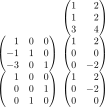

In [2]:
A = sym.Matrix([[1, 2], [1, 2], [3, 4]])
spec = la_figures.ge_tbl_spec(
    A,
    #pivoting="none",
    gj=False,
)
spec["outer_hspace_mm"] = 8
spec["cell_align"] = "r"

svg = ge_grid_svg(**spec)
display(SVG(svg))

# RHS and Partial Pivoting
Augmented system with partial pivoting and callouts.


In [5]:
A = sym.Matrix([[2, 1], [4, 3]])
rhs = sym.Matrix([[5], [11]])
spec = la_figures.ge_tbl_spec(
    A,
    ref_rhs=rhs,
    pivoting="partial",
    gj=True,
    #show_pivots=True,
    array_names=["E", ["A", "b"]],
    callouts=True,
)
spec["outer_hspace_mm"] = 6
spec["cell_align"] = "r"
svg = ge_grid_svg(**spec)
display(SVG(svg))

TypeError: ge_tbl_spec() got an unexpected keyword argument 'array_names'

# Inspect TeX/Artifacts
Use `output_dir` and `output_stem` to retain TeX/SVG artifacts for debugging.


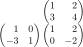

% -----------------------------------------------------------------------------
% GE template (layout-only)
% Target: current nicematrix (CodeBefore/Body/CodeAfter + \SubMatrix syntax)
% -----------------------------------------------------------------------------
\documentclass[notitlepage]{article


In [9]:
A = sym.Matrix([[1, 2], [3, 4]])
spec = la_figures.ge_tbl_spec(A, pivoting="none", gj=False, show_pivots=False)
svg = ge_grid_svg(**spec, output_dir="tmp", output_stem="ge_basic")
display(SVG(svg))
with open("tmp/ge_basic.tex", "r" ) as f:
    print( f.read()[0:300] )

In [8]:
!rm tmp/*